In [ ]:
import datetime as dt
import statsmodels.api as sm
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
import pickle

In [ ]:
df = pd.read_csv('Karimnagar_AQI.csv',index_col = 'time')
df = df.drop('Unnamed: 0',axis = 1)
train = df[:72]
test = df[72:]

[]

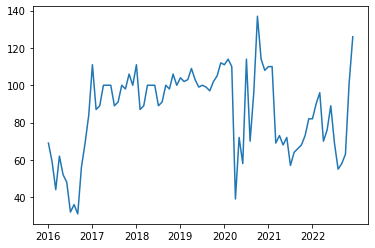

In [ ]:
year = df.index.str[:4]
plt.plot(df.index,df['value'])
xticks = df.index[::12]
plt.xticks(xticks,labels = year[::12])
plt.plot()

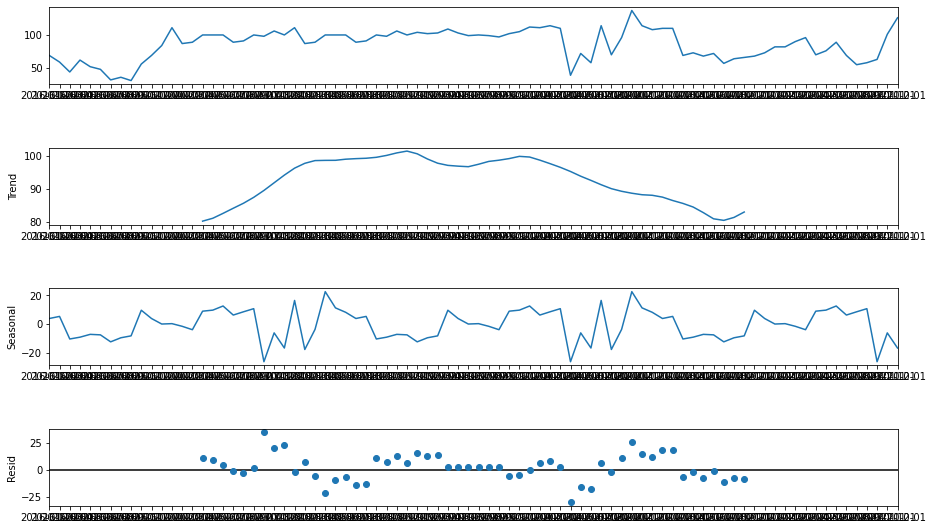

In [ ]:
res = sm.tsa.seasonal_decompose(df,period=30)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [ ]:
res = sm.tsa.adfuller(df.dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.028862469965602256


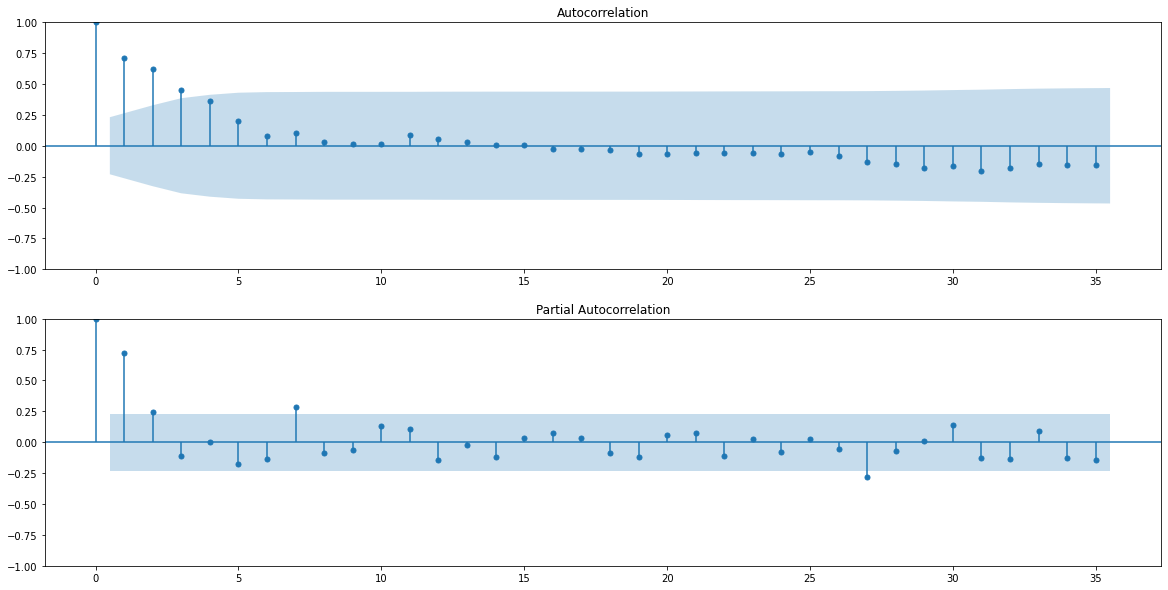

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(train.dropna(), lags=35, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(train.dropna(), lags=35, ax=ax[1])
plt.show()

In [ ]:
arima = sm.tsa.statespace.SARIMAX(train,order=(20,1,5),freq='MS',
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()

In [ ]:
test1 = test['value']
pred = arima.predict('2021-12-01','2022-12-01')[1:]
print('ARIMA model MSE  : {}'.format(mean_squared_error(test1,pred)))
MAPE = np.sum(np.abs((test1.values-pred.values)/test1.values))*100/12
print('ARIMA model MAPE : ' + str(MAPE))

ARIMA model MSE  : 501.7286024533625
ARIMA model MAPE : 23.944387915212754


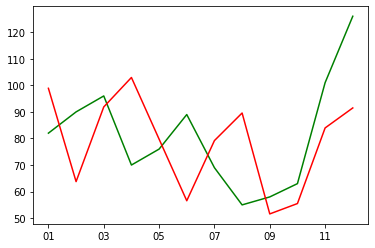

[[ 82]
 [ 90]
 [ 96]
 [ 70]
 [ 76]
 [ 89]
 [ 69]
 [ 55]
 [ 58]
 [ 63]
 [101]
 [126]]


In [ ]:
plt.plot(test1.index,test1.values,color='g')
plt.plot(test1.index,pred.values,color='r')
year = test.index.str[5:7]
xticks = test1.index[::2]
plt.xticks(ticks = xticks,labels = year[::2])
plt.show()
print(test.values)

In [ ]:
arima1 = sm.tsa.statespace.SARIMAX(df,order=(20,1,5),freq='MS',seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()

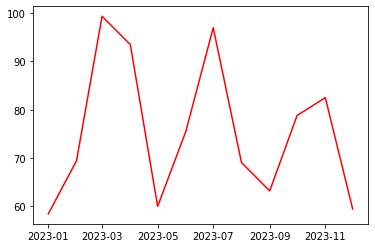

In [ ]:
pred1 = arima.predict('2022-12-01','2023-12-01')[1:]
plt.plot(pred1.index,pred1.values,color='r')
plt.show()

In [ ]:
pickle.dump(arima, open('Karimnagar_Model.pkl', 'wb'))